In [1]:
import numpy as np
import matplotlib.pylab as plt
import yt
import astropy.constants as cn
import astropy.units as u
from scipy import interpolate,signal
import scipy
from matplotlib import ticker, cm
import matplotlib as mpl
import sys
from matplotlib.lines import Line2D
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.signal import stft
from scipy.fftpack import fft, fftfreq
import matplotlib.colors as colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.signal import savgol_filter
import h5py
import os
G = 6.67e-8
c=1e10

tbounce_SFHo=0.299
tbounce_SRO=0.317
c_light = 3e10
Grav=6.67e-8

In [2]:
list_file = !ls s20*SFHo*.dat
!head -1 s20_ref_Gang_SFHo_new.dat
print( list_file)

list_file= !ls s20*SFHo*.dat

for i in list_file: 
    if not os.path.isfile('output/'+i[:-5]+'_hdf5_chk_0006'):
        list_file.remove(i)
# list_file.remove('s20_ref_Gang_SFHo_hr.dat')
# list_file.remove('s20_simp_SFHo_Gang.dat')
# list_file.remove('s20_ref_Hann_SFHo_hr.dat')
# list_file.remove("s20_ref_Gang_SFHo_per.dat")
# list_file.remove("s20_simp_SFHo3.dat")


head: cannot open 's20_ref_Gang_SFHo_new.dat' for reading: No such file or directory
['s20_ref_Gang_SFHo8.dat', 's20_ref_Gang_SFHo_hr8.dat', 's20_ref_Gang_SFHo_new8.dat', 's20_ref_Gang_SFHo_per.dat', 's20_ref_Hann_SFHo8.dat', 's20_ref_Hann_SFHo_hr8.dat', 's20_ref_SFHo_nb78.dat', 's20_simp_SFHo37.dat', 's20_simp_SFHo_Gang7.dat', 's20_simp_SFHo_Gang88.dat', 's20_simp_SFHo_Gang_nr8.dat', 's20_simp_SFHo_Hann88.dat']


In [3]:
for i in list_file: 
    if not os.path.isfile('output/'+i+'_hdf5_chk_0006'):
        continue
    test=h5py.File('output/'+i+'_hdf5_chk_0006')
    time=test['real scalars'][2][-1]
    r_shock=test['real scalars'][2][-1]
    print(i,time,test['integer runtime parameters'][74][-1])

In [4]:
print(list_file)

['s20_ref_Gang_SFHo8.dat', 's20_ref_Gang_SFHo_hr8.dat', 's20_ref_Gang_SFHo_new8.dat', 's20_ref_Hann_SFHo8.dat', 's20_ref_Hann_SFHo_hr8.dat', 's20_ref_SFHo_nb78.dat', 's20_simp_SFHo37.dat', 's20_simp_SFHo_Gang7.dat', 's20_simp_SFHo_Gang88.dat', 's20_simp_SFHo_Gang_nr8.dat', 's20_simp_SFHo_Hann88.dat']


In [5]:
for i in list_file:
    globals()[i] = np.loadtxt(i,unpack=True,usecols=(0,45,46,47,51,52,53,57,58,59))

In [6]:
for i in list_file:
    print(i)
    if '8.dat' in i :
        globals()['alpha'+i]=1.
    elif '7.dat' in i :
        globals()['alpha'+i]=0.5
    else: 
        globals()['alpha'+i]=1.
    if 'ref' in i: 
        globals()['ticks'+i]='-'
    else:
        globals()['ticks'+i]='--'
        

    if ('Gang' in i) & ('SFHo' in i) : 
        globals()['color'+i]='orange'
        globals()['tb'+i]=0.300
    elif 'nr' in i :
        globals()['color'+i]='m'
    elif 'SFHo' in i :
        globals()['color'+i]='r'
        globals()['tb'+i]=0.300
    elif ('Gang' in i) & ('SRO' in i) : 
        globals()['color'+i]='g'
        globals()['tb'+i]= 0.319
    elif 'SRO' in i :
        globals()['color'+i]='b'
        globals()['tb'+i]= 0.319
      
    else:
        globals()['color'+i]='k'
        globals()['tb'+i]= 0.319
        print("case not found")
        

s20_ref_Gang_SFHo8.dat
s20_ref_Gang_SFHo_hr8.dat
s20_ref_Gang_SFHo_new8.dat
s20_ref_Hann_SFHo8.dat
s20_ref_Hann_SFHo_hr8.dat
s20_ref_SFHo_nb78.dat
s20_simp_SFHo37.dat
s20_simp_SFHo_Gang7.dat
s20_simp_SFHo_Gang88.dat
s20_simp_SFHo_Gang_nr8.dat
s20_simp_SFHo_Hann88.dat


In [7]:
def spectrogram_full(t,h,shift_value=1e-4,window_length=25e-3):
    from scipy.fftpack import fft
    from scipy import signal
    N = 4*512
    nf = 2*N
    wdt = window_length
    dt = wdt/(nf)
    freq = np.fft.fftfreq(nf, d=dt)

    ffpeuq = interpolate.interp1d(t, h)
    tshift = min(t)
    fnyq = max(freq)
    bl, al = signal.butter(2, 5000.0/fnyq,'low')  #create filter lowpass
    bh, ah = signal.butter(2, 25.0/fnyq,'high')   #create filter highpass
    window = scipy.signal.windows.kaiser(nf,2.5)
    window =  scipy.signal.windows.blackman(nf)
    t2 = np.linspace(tshift,wdt+tshift,nf)
    tarr = []
    fttm = []
    j = 0
    while(max(t2) < max(t)):
        amp = ffpeuq(t2)
        amp1 = signal.filtfilt(bh, ah, amp)
        amp2 = signal.filtfilt(bl, al, amp1)
        amp3 = amp2*window
        fftamp  = (np.abs(fft(amp3))[0:N]**2) /np.sum(window)**2
        fttm.append([])
        fttm[j] = fftamp
        tarr.append((max(t2)+min(t2))*0.5)
        tshift = tshift + shift_value
        t2 = np.linspace(tshift,wdt+tshift,nf)
        j = j+1
    rt = fttm,freq[0:N],tarr
    return rt
    
def plot_spectrogram(t,h,filename="specs.png",modes=None,cmap='viridis',
                    shift_value=1e-4,window_length=25e-3,nlevels=50,low=-6,high=0):
    t = t - min(t)
    jet = cm = plt.get_cmap(cmap)
    v = np.linspace(low,high,nlevels)
    
    f1,ax=plt.subplots(figsize=(20,10),ncols=1,nrows=1,sharex="row",sharey="row")
    ffc,f,t1=spectrogram_full(t,h,shift_value,window_length)
    ft=np.log10((np.transpose(ffc/np.max(ffc))**2+1e-13))
    cb=ax.contourf(np.array(t1),f,ft,v,cmap=jet,extend="both")
    f1.subplots_adjust(hspace=0.,wspace=0.0)
    # ax.set_ylim([25,2250])
    ax.set_xlim([min(t1),max(t1)])
    ax.set_yticks([100,250,400,550,700,850,1000,1150])
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(3))
    ax.set_xlabel(r'$\mathrm{Time\,[ms]}$')
    ax.set_ylabel(r'$\mathrm{Frequency\,[Hz]}$')
    
    if(modes):
        for key in modes.keys():
            ax.plot(t,modes[key],'--',lw=3.5,c="black")

    f1.colorbar(cb,ax=ax,ticks=[0,-1,-2,-3,-4,-5,-6],pad=0.007,aspect=30)
    # plt.savefig(filename,bbox_inches='tight')
    plt.show()

def spectrogram(I2_interp, time_list, delta_t_mean, sample_frequency_mean, 
                hann_window=40e-3, overlap_fact=0.5, nfft_fact=1, name=None, plot=False, energy=False,
               window_name = 'hann'):
    if energy == False:
        Nperseg = int(hann_window/delta_t_mean)
        Noverlap = int(Nperseg*overlap_fact)
        Nfft = Nperseg*nfft_fact
        #print(len(time_list)/Nperseg)
        prefactor = (3/2)*(cn.G/cn.c**4).cgs.value

        t2 = np.linspace(time_list.min(),time_list.max(),len(time_list)*nfft_fact)
        print(t2)
        dt = np.mean(t2[1:]-t2[:-1])
        df = 1/dt
        fnyq = 0.5*df
        I2_eq = I2_interp(t2)
        
        bl, al = signal.butter(2, 5000.0/fnyq,'low')# create filter 
        bh, ah = signal.butter(2, 25.0/fnyq,'high')

        I2_eq = signal.filtfilt(bh, ah,  I2_eq) #apply filter
        I2_eq= signal.filtfilt(bl, al,  I2_eq)
        
        f_list, tau_list, Zxx = stft(prefactor*I2_eq,df, 
                                     nperseg=Nperseg, noverlap=Noverlap, window=window_name, nfft=Nfft)
        spectrogr = np.abs(Zxx)**2
        
    if energy:
        Nperseg = int(hann_window/delta_t_mean)
        Nfft = Nperseg*nfft_fact
        #print(len(time_list)/Nperseg)
        f_list, tau_list, Zxx = stft(I2_interp(time_list), sample_frequency_mean, 
                                     nperseg=Nperseg,window=window_name, nfft=Nfft)
        Zabs = np.abs(Zxx)
        #print(Zxx.shape)
        
        pref_matrix = np.zeros((len(f_list),len(tau_list)))
        Constant = 3/5 *(cn.G/cn.c**5).cgs.value*(2*np.pi)**2
        for i in range(len(f_list)):
            for j in range(len(tau_list)):
                pref_matrix[i][j] = Constant*f_list[i]**2
                #print(pref_matrix[i][j])
        spectrogr = np.multiply(Zabs, pref_matrix)
    if plot:
        plt.figure(figsize=(15,8))
        v = np.linspace(-6,0.1,70)
        plt.contourf(tau_list, f_list, np.log10(np.abs(spectrogr)**2/3e3+1e-13),
                     v,extend="min")
        print(np.max(np.abs(spectrogr)**2))
        plt.colorbar(orientation='horizontal')
        plt.ylim(0,2000)
        #plt.xlim(0,0.4)
    return f_list, tau_list, spectrogr

def high_pass_filter(signal, cutoff_frequency, fs):
    from scipy.signal import butter, filtfilt
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(N=5, Wn=normal_cutoff, btype='high', analog=False)
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

In [8]:
def plot_interp(x,y):
#     time=x
#     tau_new=savgol_filter(y,20,3)
    f = interpolate.interp1d(x, y)
    time=np.linspace(x.min(),x.max(),300)
    tau_new= f(time)
    return time, tau_new

/opt/spack/opt/spack/linux-debian11-skylake_avx512/gcc-10.2.1/py-numpy-1.25.2-q7iygs5krvwa7uzo5qctzwkd25ww6drh/lib/python3.10/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/opt/spack/opt/spack/linux-debian11-skylake_avx512/gcc-10.2.1/py-numpy-1.25.2-q7iygs5krvwa7uzo5qctzwkd25ww6drh/lib/python3.10/site-packages/numpy/lib/function_base.py:1244: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/opt/spack/opt/spack/linux-debian11-skylake_avx512/gcc-10.2.1/py-numpy-1.25.2-q7iygs5krvwa7uzo5qctzwkd25ww6drh/lib/python3.10/site-packages/numpy/lib/function_base.py:1250: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
/opt/spack/opt/spack/linux-debian11-skylake_avx512/gcc-10.2.1/py-numpy-1.25.2-q7iygs5krvwa7uzo5qctzwkd25ww6drh/lib/python3.10/site-packages/numpy/lib/function_base.py:1243

(0.0, 140000.0)

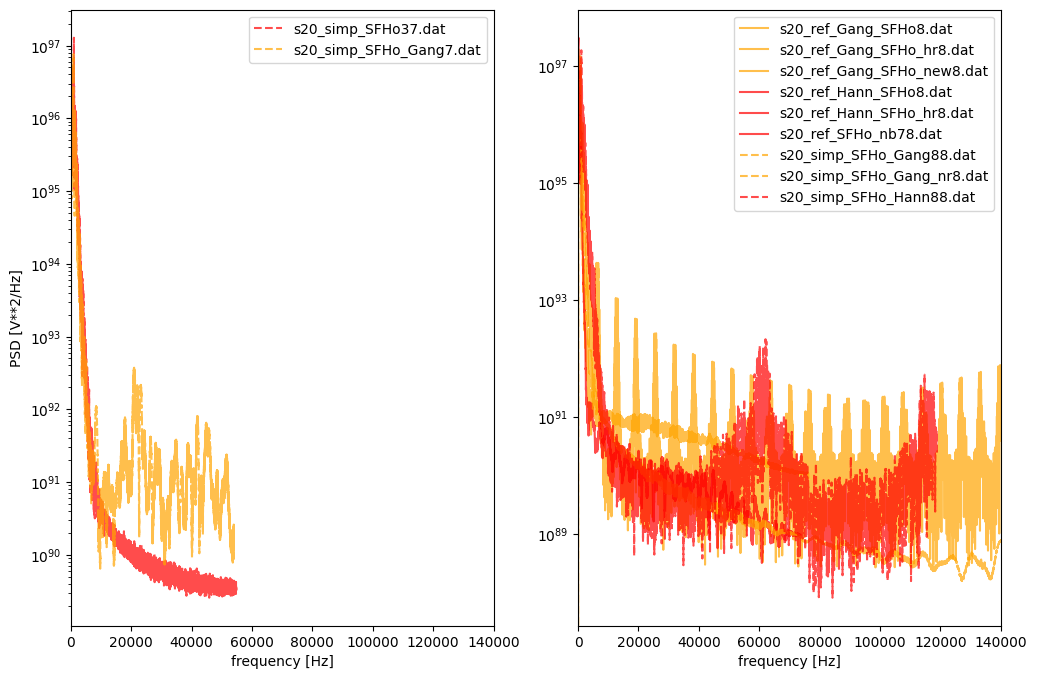

In [9]:


fig,ax = plt.subplots(1,2,figsize=(12,8))
sublist=[x for x in list_file if ('7.' in x)]
# sublist.remove('s20_simp_SFHo_Gang8.dat')
for i in sublist:

    timecheck=globals()[i][0]-tbounce_SFHo
    straincheck=globals()[i][3]+globals()[i][6]+globals()[i][9]
    straincheck = np.gradient(straincheck,timecheck)
    fiper = interpolate.interp1d(timecheck,straincheck)
    tip = np.linspace(timecheck[0],timecheck[-1],len(timecheck))
    (freq, Sigs) = scipy.signal.periodogram(fiper(tip),1/(tip[1]-tip[0]), scaling='density')
    ax[0].semilogy(freq,savgol_filter(Sigs,20,1), ls=globals()['ticks'+i],label=str(i),alpha=0.7,color=globals()['color'+i])
    # ax[0].semilogy(freq,Sigs, ls=globals()['ticks'+i],label=str(i),alpha=0.7,color=globals()['color'+i]) #


sublist=[x for x in list_file if ('8.' in x)]


for i in sublist:
    timecheck=globals()[i][0]-tbounce_SFHo
    straincheck=globals()[i][3]+globals()[i][6]+globals()[i][9]
    straincheck = np.gradient(straincheck,timecheck)
    fiper = interpolate.interp1d(timecheck,straincheck)
    tip = np.linspace(timecheck[0],timecheck[-1],len(timecheck))
    (freq, Sigs) = scipy.signal.periodogram(fiper(tip),1/(tip[1]-tip[0]), scaling='density')
    ax[1].semilogy(freq,savgol_filter(Sigs,10,1), ls=globals()['ticks'+i],label=str(i),alpha=0.7,color=globals()['color'+i])
    # ax[1].semilogy(freq,Sigs, ls=globals()['ticks'+i],label=str(i),alpha=0.7,color=globals()['color'+i])
    
ax[0].legend()
ax[1].legend()
ax[0].set_xlabel('frequency [Hz]')
ax[1].set_xlabel('frequency [Hz]')
ax[0].set_ylabel('PSD [V**2/Hz]')
ax[0].set_xlim([0,140000])
ax[1].set_xlim([0,140000])
# ax[0].set_ylim([1e92,1e100])
# ax[1].set_ylim([1e92,1e100])

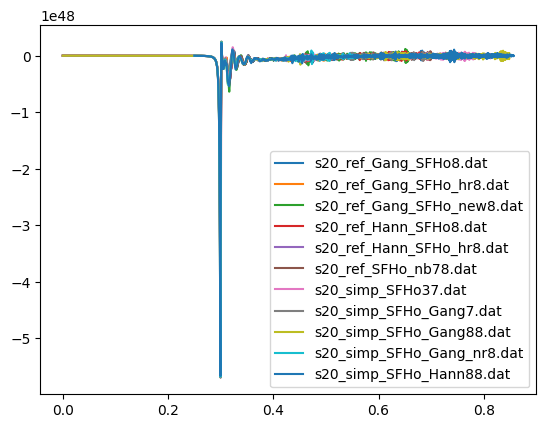

In [10]:
for i in list_file:
    Y=globals()[i][0]
    X=globals()[i][1]
    plt.plot(np.sort(Y),[x for _, x in sorted(zip(Y, X))],label=i)
    plt.legend()

In [ ]:


fig,ax = plt.subplots(10,1,figsize=(8,38))
sublist=[x for x in list_file if ('8.' in x)]
# sublist.remove('s20_simp_SFHo_Gang8.dat')
num_fig=1
for i in sublist:

    time=np.sort(globals()[i][0])
    # strain=globals()[i][3]+globals()[i][6]+globals()[i][9]

    Y=globals()[i][0]
    X=globals()[i][3]+globals()[i][6]+globals()[i][9]
    strain=[x for _, x in sorted(zip(Y, X))]
    # tau=globals()[i][0]
    # x=globals()[i][3]+globals()[i][6]+globals()[i][9]
    # time,strain=plot_interp(x,tau)
    ax[0].plot(time-globals()['tb'+i],savgol_filter(strain,500,1), ls=globals()['ticks'+i],label=str(i),color=globals()['color'+i])
    strain = np.gradient(strain,time)
    
    # tip = np.linspace(time[0],time[-1],len(time))
    fiper = interpolate.interp1d(time,strain)
    # freq_max=(1/np.diff(np.unique(time))).max()
    delta_t_mean = np.mean(np.diff(np.unique(time)))
    sample_frequency_mean = 1/delta_t_mean
    print(delta_t_mean)

    hann_window=50e-3
    overlap_fact=0.95
    nfft_fact=1
    window_name='hann'
    Nperseg = int(hann_window/delta_t_mean)
    Noverlap = int(Nperseg*overlap_fact)
    Nfft = Nperseg*nfft_fact
    #print(len(time_list)/Nperseg)
    prefactor = (3/2)*(cn.G/cn.c**4).cgs.value



    
    print(Nperseg,Noverlap,Nfft)



    
    t2 = np.linspace(time.min(),time.max(),len(time)*nfft_fact)
    print(t2)
    dt = np.mean(np.diff(t2))
    df = 1/dt
    # df = freq_max*1e-2
    fnyq = 0.5*df
    I2_eq = fiper(t2)
    
    bl, al = signal.butter(2, 5000.0/fnyq,'low')# create filter 
    bh, ah = signal.butter(2, 25.0/fnyq,'high')

    I2_eq = signal.filtfilt(bh, ah,  I2_eq) #apply filter
    I2_eq= signal.filtfilt(bl, al,  I2_eq)
    print('df',df)
    f_list, tau_list, Zxx = stft(prefactor*I2_eq,df, 
                                  nperseg=Nperseg, noverlap=Noverlap, window=window_name, nfft=Nfft)
    spectrogr = np.abs(Zxx)**2











    
    
    # f_list, tau_list, spectrogr = spectrogram(fiper, time, delta_t_mean, sample_frequency_mean)
    #                                           hann_window=25e-3, overlap_fact=0.95, nfft_fact=1, 
    #                                           name=None, plot=False, energy=False,
    #                                          window_name='blackman')
    # plt.title(i[-4])
    # ax[0].semilogy(freq,Sigs, ls=globals()['ticks'+i],label=str(i),alpha=0.7,color=globals()['color'+i]) #
    # print(np.max(np.abs(spectrogr)**2))

    v = np.linspace(-7,0,300)
    spec=np.log10(np.abs(spectrogr)**2/3e3+1e-13)
    # spec[spec<-4.320]=np.nan
    # print(i,tau_list[0],tau_list[-1],time.min(),time.max())
    ax[num_fig].contourf(tau_list, f_list, spec 
                 ,extend="min",alpha=0.5)
    ax[num_fig].set_ylim(0,2000)

    # ax[num_fig].set_xlim(0,0.4)
    ax[num_fig].title.set_text(i)
    num_fig+=1
ax[0].set_xlim(0,0.4)


Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]),

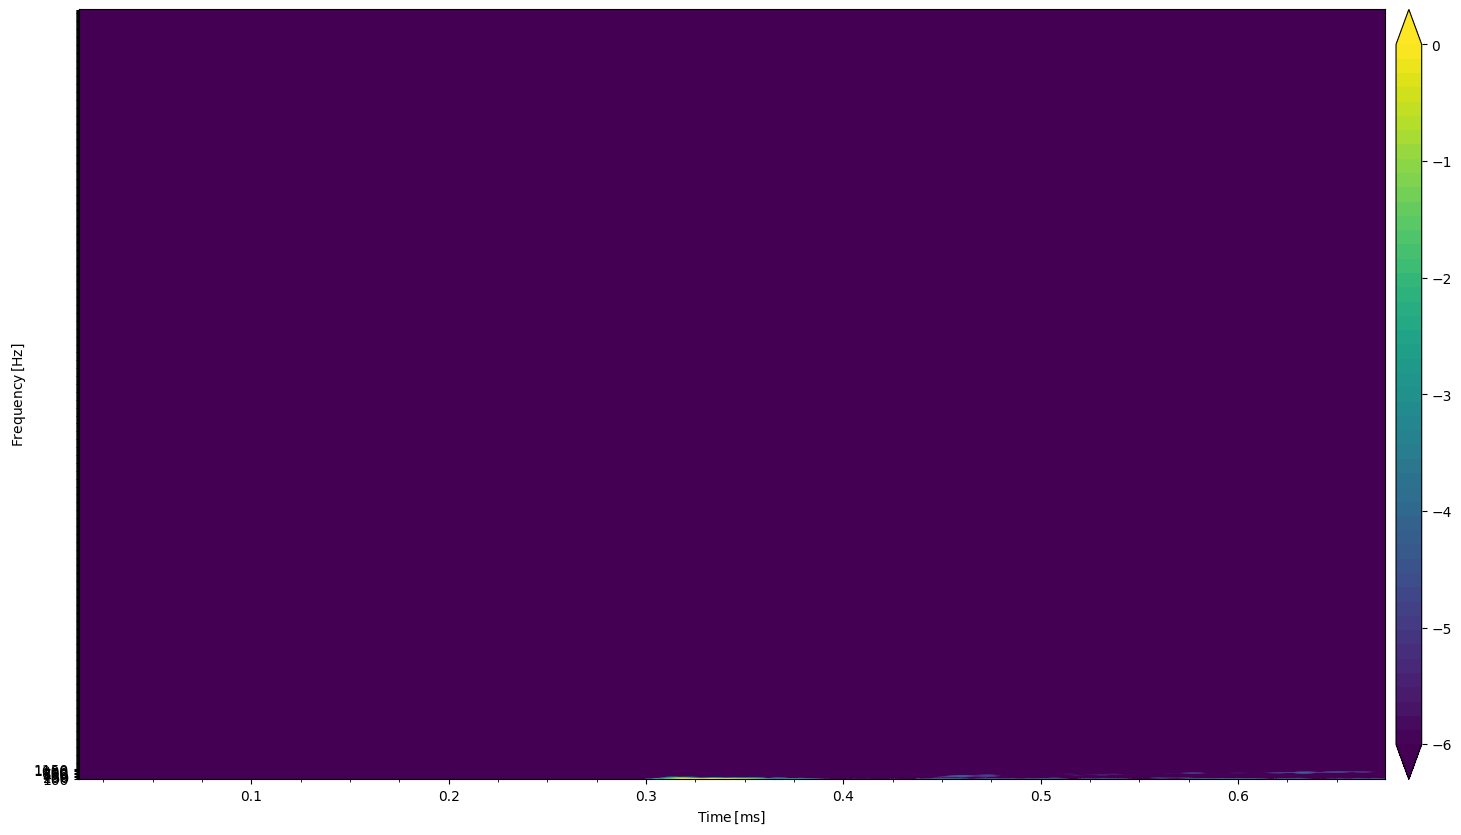

Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]),

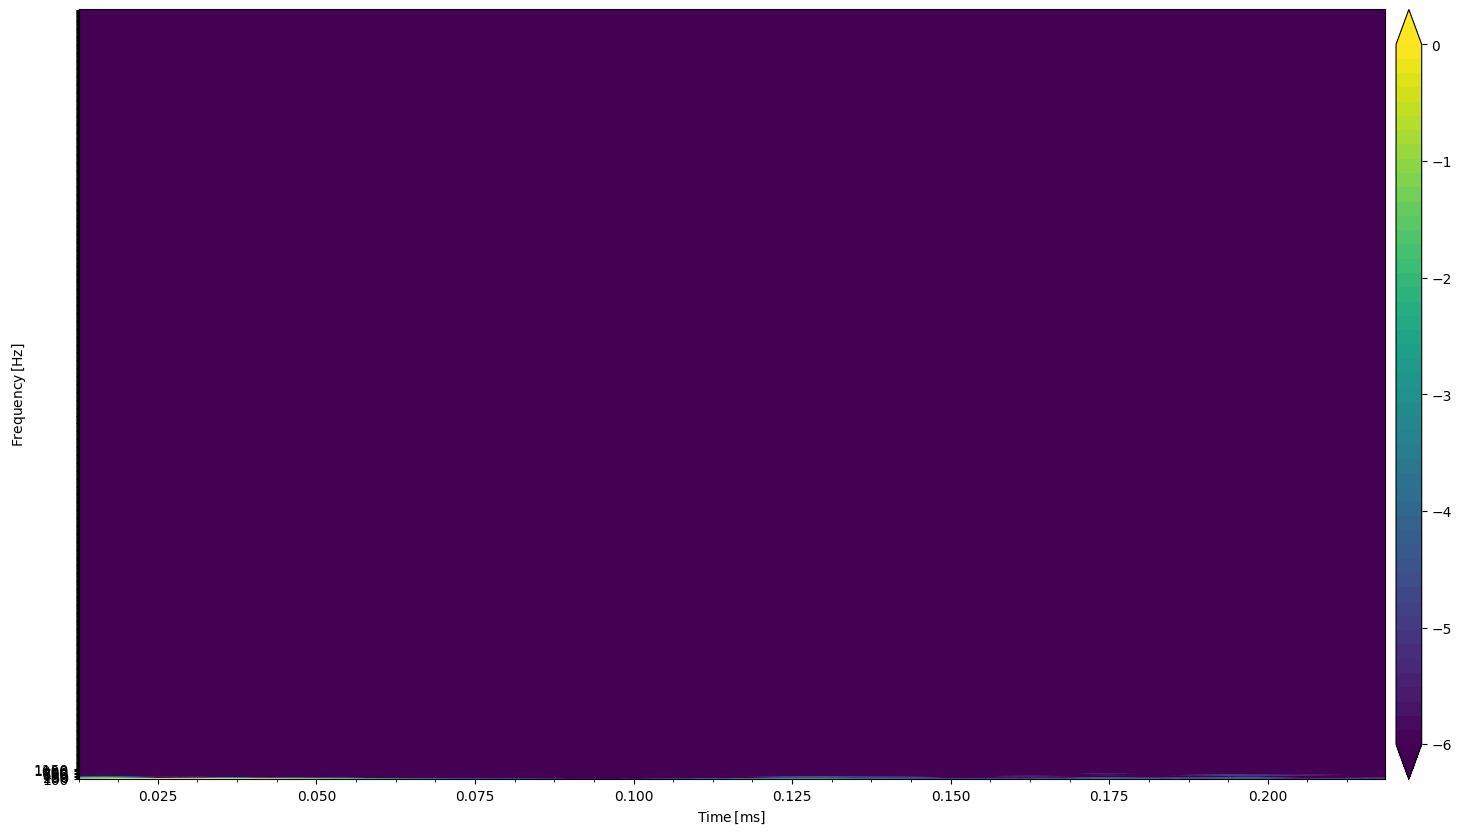

Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]),

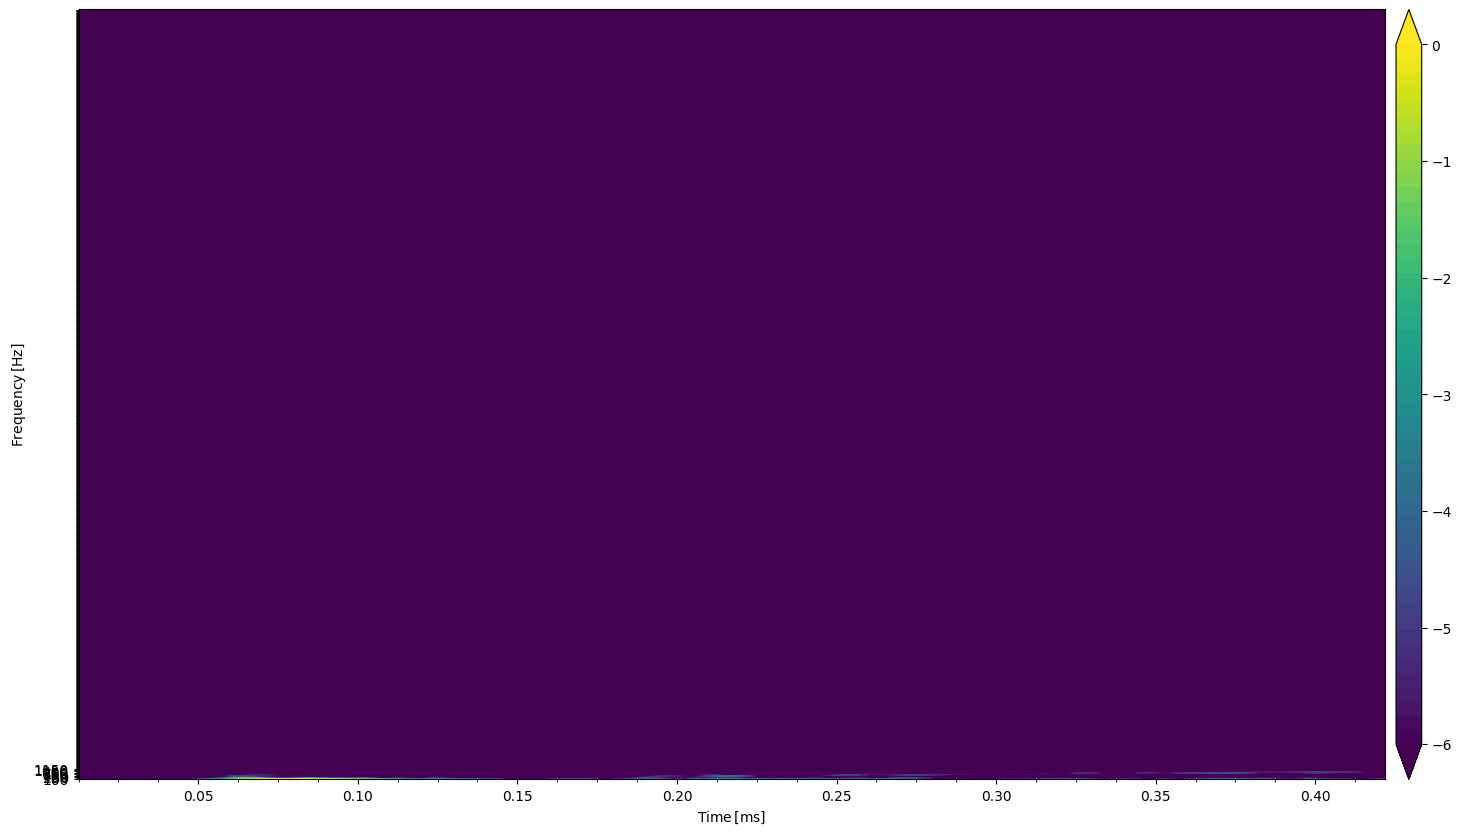

Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]),

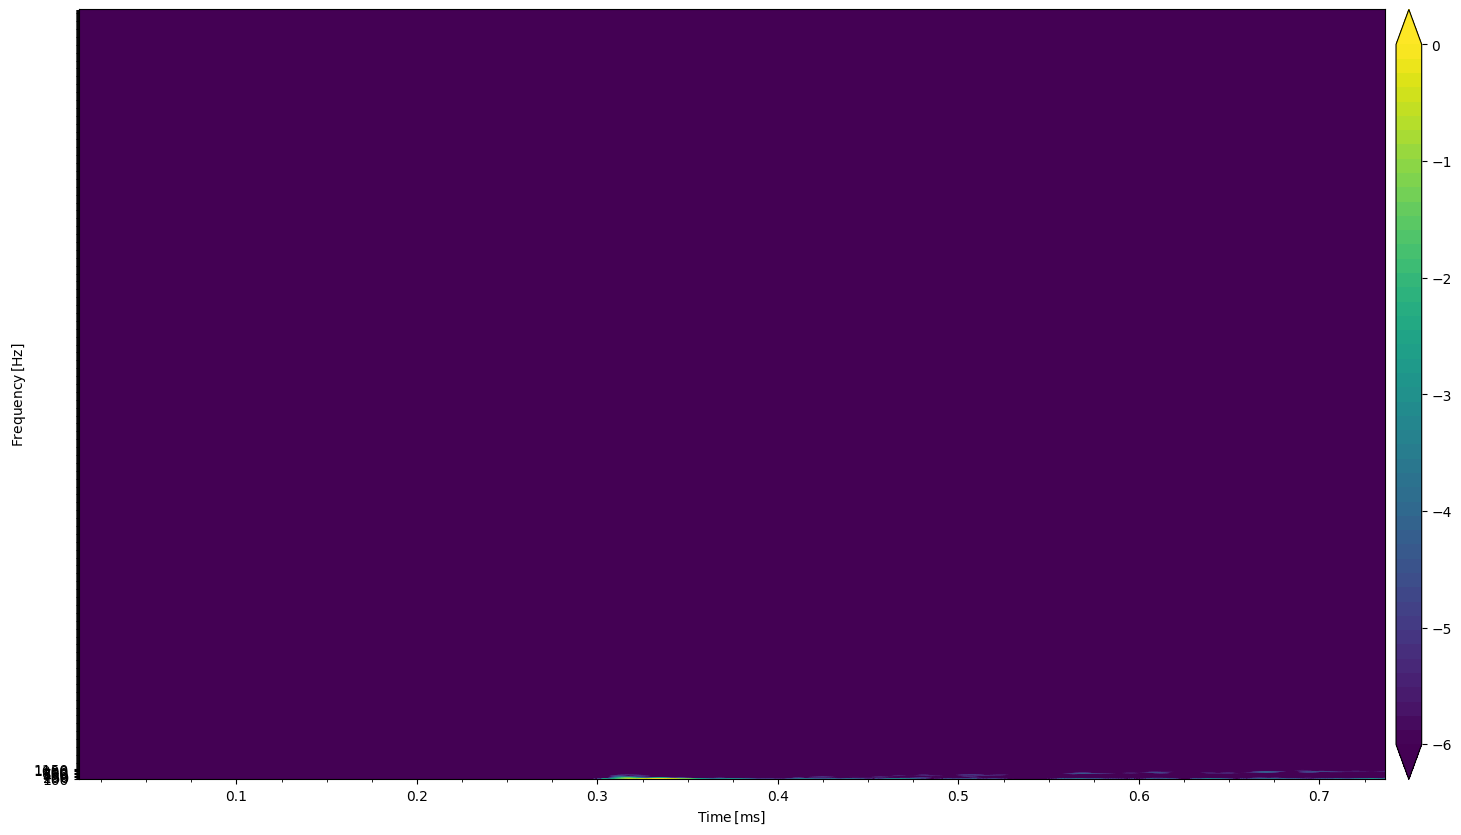

Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]),

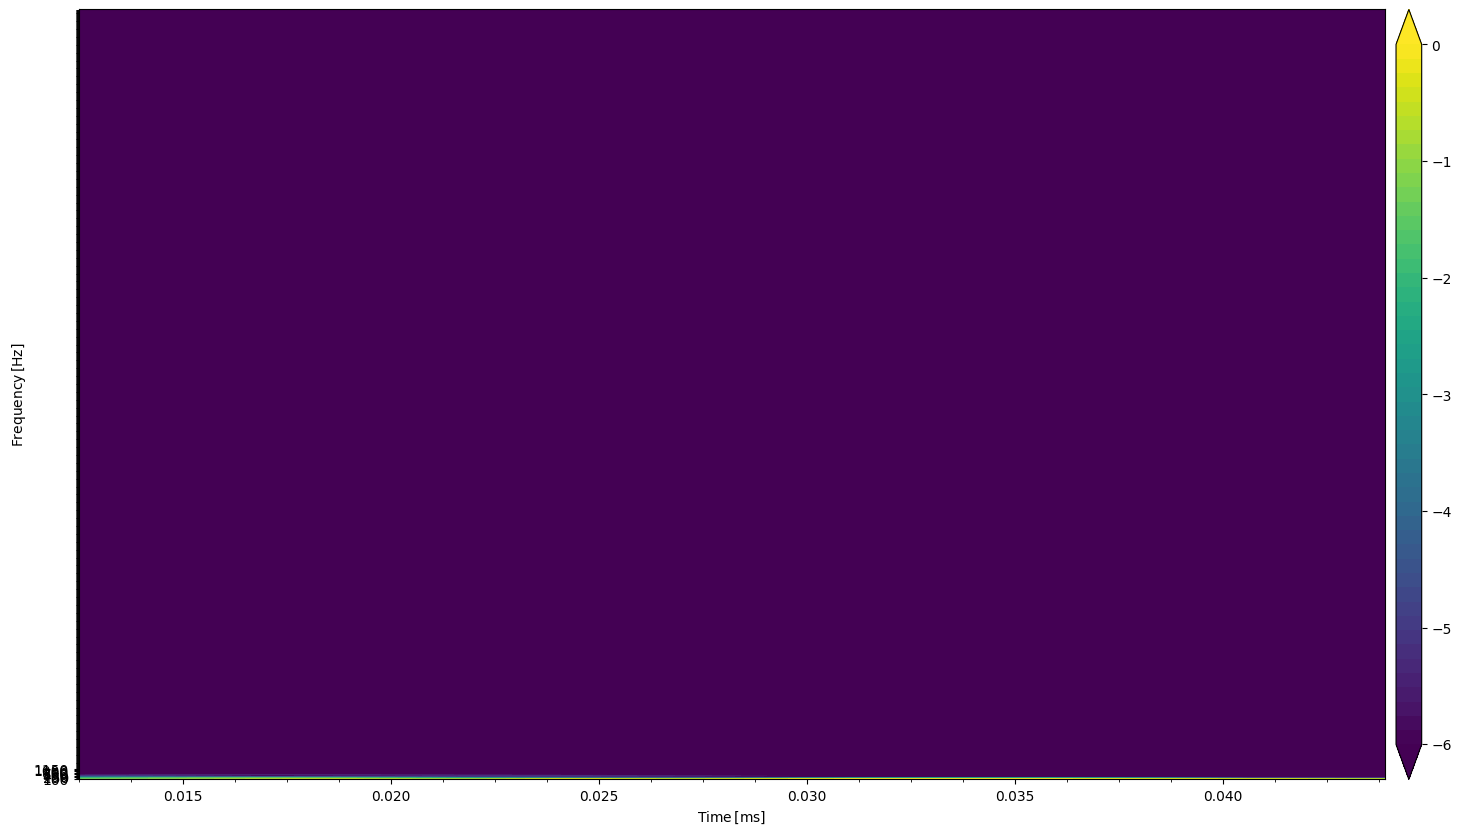

Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]),

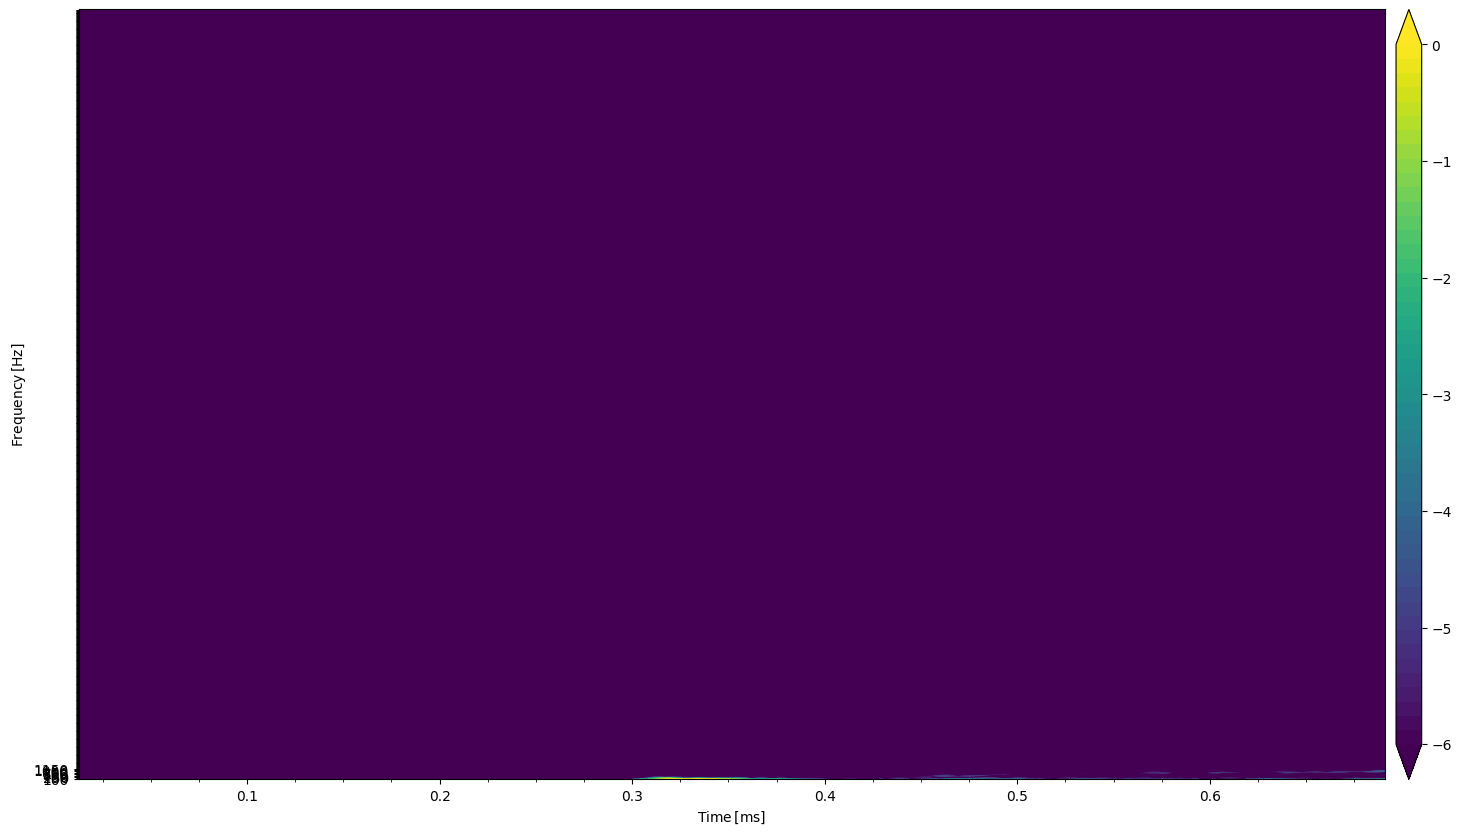

Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]),

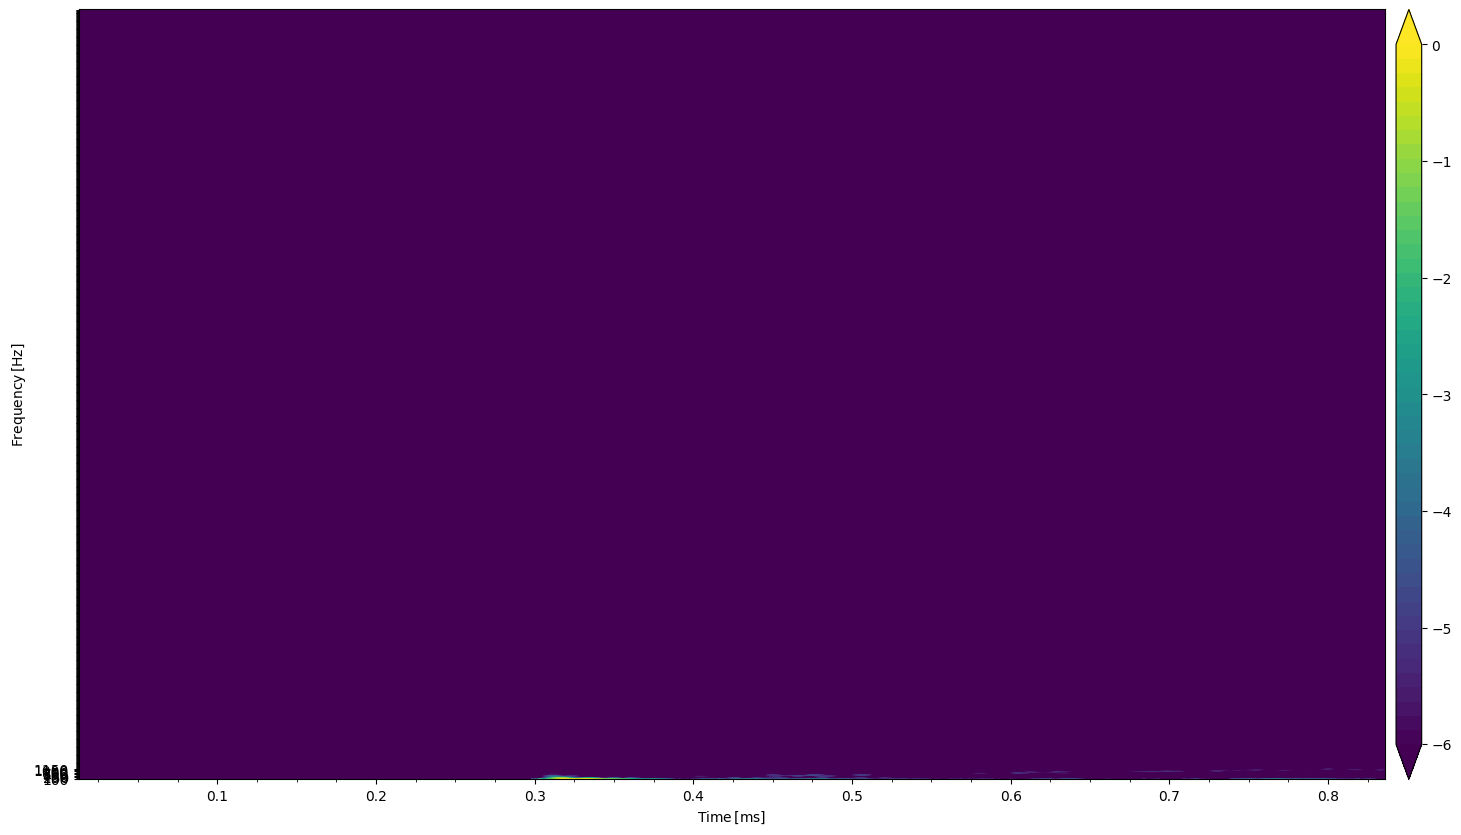

Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]),

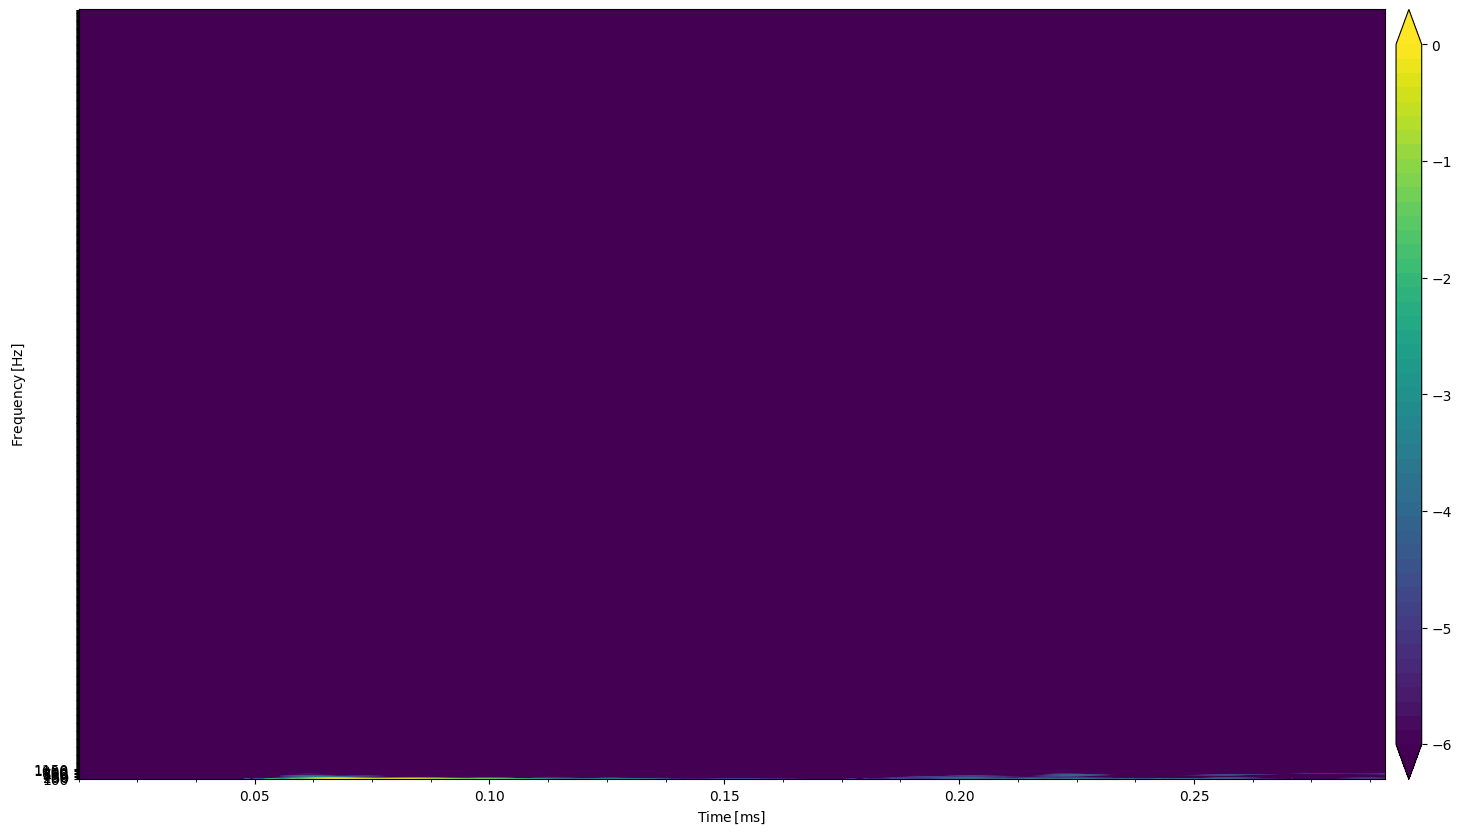

Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1639 ticks ([0.0, ..., 81900.0]),

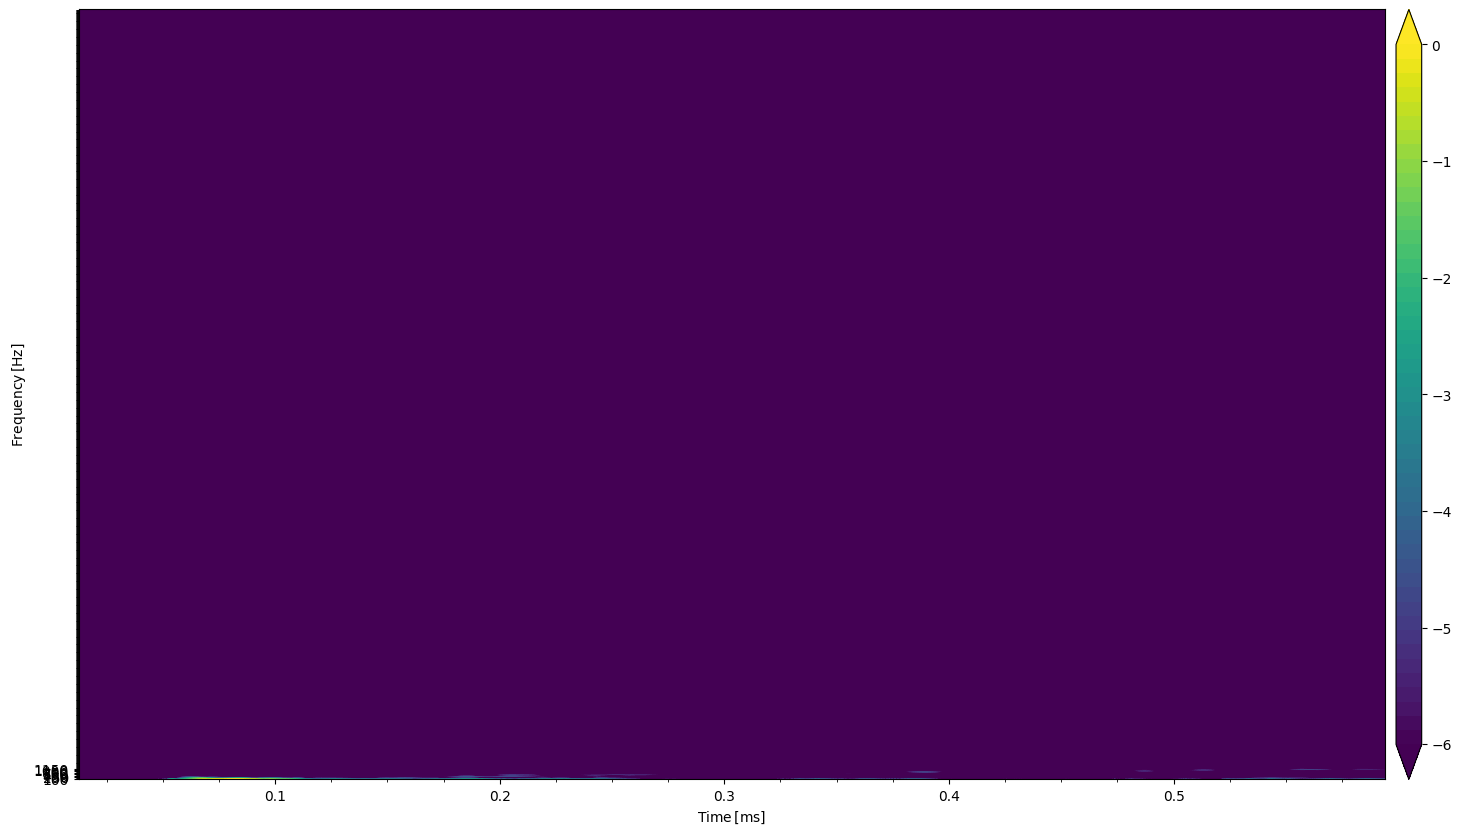

In [12]:
for i in sublist:

    timecheck=np.sort(globals()[i][0]-globals()['tb'+i])
    # straincheck=globals()[i][3]+globals()[i][6]+globals()[i][9]

    Y=globals()[i][0]
    X=globals()[i][3]+globals()[i][6]+globals()[i][9]
    straincheck=[x for _, x in sorted(zip(Y, X))]
    # plt.title(i)
    plot_spectrogram(timecheck,straincheck)

[Text(0, -8.0, ''),
 Text(0, -6.0, ''),
 Text(0, -4.0, ''),
 Text(0, -2.0, ''),
 Text(0, 0.0, ''),
 Text(0, 2.0, ''),
 Text(0, 4.0, '')]

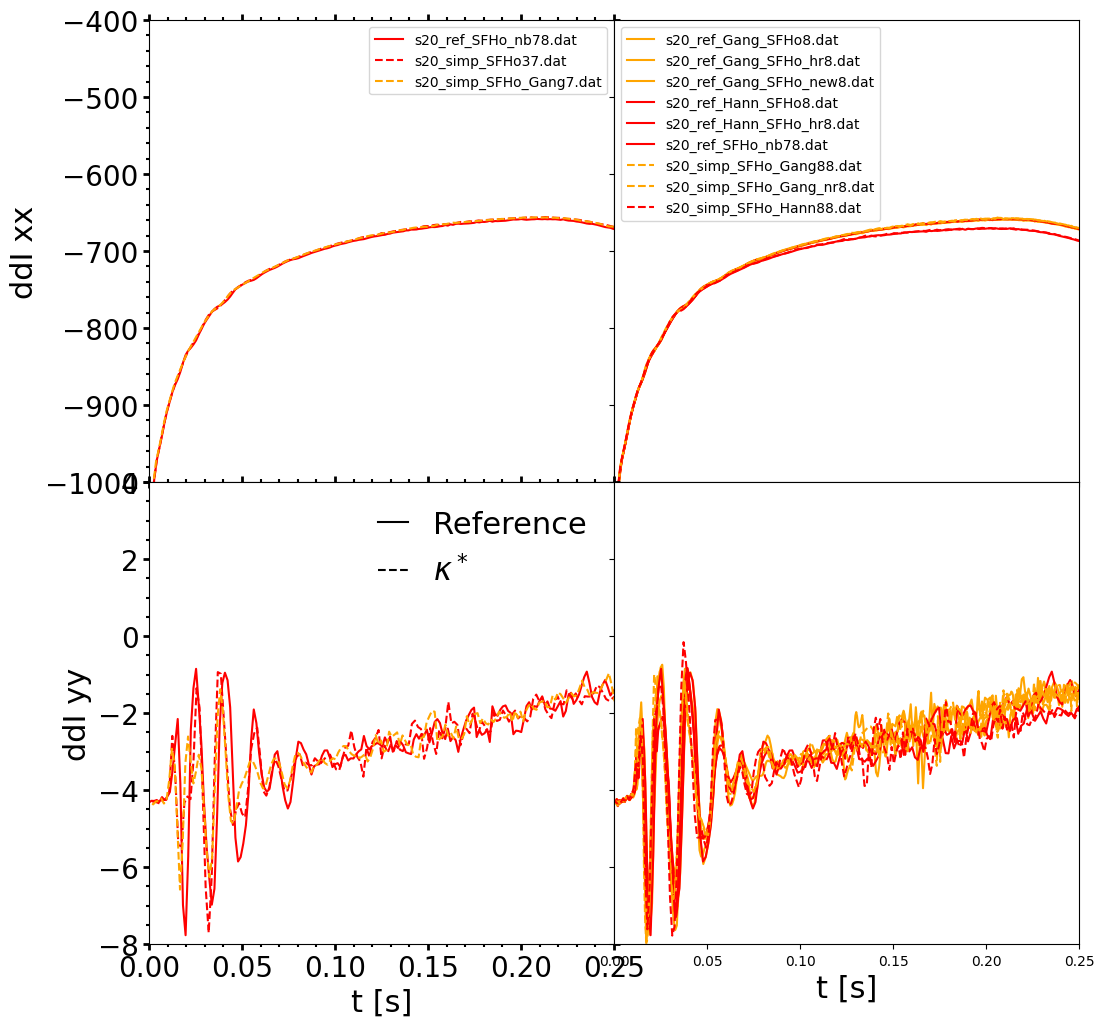

In [13]:
tbounce_SFHo=0.299
tbounce_SRO=0.317

col=['orange','r','r','orange','orange','b','g']

factor=1.5*G/c**4

fig,ax = plt.subplots(2,2,figsize=(12,12))
ax1=ax[0,0]
ax2=ax[1,0]
ax3=ax[0,1]
ax4=ax[1,1]
#ax2=ax[1]

sublist=[x for x in list_file if ('7' in x)]

for i in sublist:

    tau=globals()[i][1]+globals()[i][4]+globals()[i][7]
    x=globals()[i][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(x.min(),x.max(),500)
    tau_new= f(time)
    ax1.plot(time-tbounce_SFHo,tau_new*factor,ls=globals()['ticks'+i],color=globals()['color'+i],label=str(i))

    tau=globals()[i][3]+globals()[i][6]+globals()[i][9]
    x=globals()[i][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(x.min(),x.max(),500)
    tau_new= f(time)
    ax2.plot(time-tbounce_SFHo,tau_new*factor,ls=globals()['ticks'+i],color=globals()['color'+i],label=str(i))



sublist=[x for x in list_file if ('8' in x)]

for i in sublist:

    tau=globals()[i][1]+globals()[i][4]+globals()[i][7]
    x=globals()[i][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(x.min(),x.max(),500)
    tau_new= f(time)
    ax3.plot(time-tbounce_SFHo,tau_new*factor,ls=globals()['ticks'+i],color=globals()['color'+i],label=str(i))

    tau=globals()[i][3]+globals()[i][6]+globals()[i][9]
    x=globals()[i][0]
    f = interpolate.interp1d(x, tau)
    time=np.linspace(x.min(),x.max(),500)
    tau_new= f(time)
    ax4.plot(time-tbounce_SFHo,tau_new*factor,ls=globals()['ticks'+i],color=globals()['color'+i],label=str(i))


black_line1, = plt.plot([], [], color='r', linestyle='-')
black_line2, = plt.plot([], [], color='orange', linestyle='-')
ax1.legend([black_line1,black_line2],[r"OPE",r"T-matrix"],fontsize=22,handlelength=1,frameon=False,loc= "upper left")

black_line1, = plt.plot([], [], color='k', linestyle='-')
black_line2, = plt.plot([], [], color='k', linestyle='--')
ax2.legend([black_line1,black_line2],[r"Reference",r"$\kappa^*$"],fontsize=22,handlelength=1,frameon=False,loc= "upper right")

ax1.set_xlim([0,0.25])
ax2.set_xlim([0,0.25])
ax3.set_xlim([0,0.25])
ax4.set_xlim([0,0.25])

ax1.set_ylim([-1000,-400])
ax3.set_ylim([-1000,-400])
ax2.set_ylim([-8,4])
ax4.set_ylim([-8,4])

ax1.legend()
ax3.legend()
for i in range(2) : 
    i=i+1

    test=globals()['ax'+str(i)]
    test.xaxis.set_minor_locator(AutoMinorLocator())
    test.yaxis.set_minor_locator(AutoMinorLocator())

    test.yaxis.set_ticks_position('both')
    test.xaxis.set_ticks_position('both')

    test.tick_params(axis='both', which='major', labelsize=20,width=2,length=4)
    test.tick_params(axis='both', which='minor', labelsize=20,width=1.5,length=2)

    
ax2.set_xlabel(r't [s]',fontsize=22)
ax4.set_xlabel(r't [s]',fontsize=22)
ax1.set_ylabel(r'ddI xx',fontsize=22)
ax2.set_ylabel(r'ddI yy',fontsize=22)


plt.subplots_adjust(wspace=0,hspace=0)
ax1.set_xticklabels([])    
ax3.set_xticklabels([])    
ax3.set_yticklabels([])    
ax4.set_yticklabels([])   

KeyError: 2

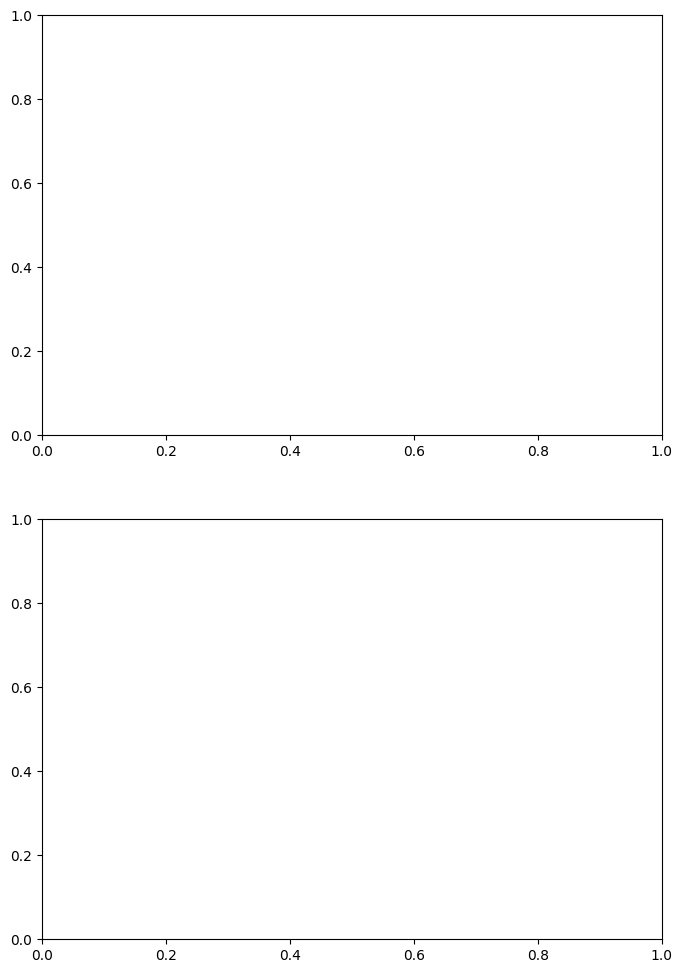

In [14]:
tbounce_SFHo=0.299
tbounce_SRO=0.317

col=['orange','r','r','orange','orange','b','g']

factor=1.5*G/c**4

fig,ax = plt.subplots(2,1,figsize=(8,12))
ax1=ax[0]
ax2=ax[1]
#ax2=ax[1]

ticks=['-','-','--','--',':']

f, t, Sxx=signal.stft(globals()[i][4],fs=1e5)

#plt.plot(np.fft(globals()[list_file[0]][1]))

ax1.pcolormesh(t, f, np.log10(abs((Sxx))), shading='auto')

ax1.set_ylabel('Frequency [Hz]')

ax1.set_xlabel('Time [sec]')

ax1.set_xlim([0,0.5])
ax1.set_ylim([0,2000])

print( np.log10(abs((Sxx))).min(), np.log10(abs((Sxx))).max())

In [ ]:
EEG = globals()[list_file[0]][7]+globals()[list_file[0]][1] +globals()[list_file[0]][1]       # Extract the EEG variable
t = globals()[list_file[0]][0]                # ... and the t variable

x = EEG                               # Relabel the data variable
dt = t[1] - t[0]                      # Define the sampling interval
N = x.shape[0]                        # Define the total number of data points
T = N * dt                            # Define the total duration of the data

xf = np.fft.fft(x - x.mean())                # Compute Fourier transform of x
Sxx = 2 * dt ** 2 / T * (xf * xf.conj())  # Compute spectrum
Sxx = Sxx[:int(len(x) / 2)]           # Ignore negative frequencies

df = 1 / T.max()                      # Determine frequency resolution
fNQ = 1 / dt / 2                      # Determine Nyquist frequency
faxis = np.arange(0,fNQ,df)              # Construct frequency axis

plt.plot(faxis, Sxx.real)                 # Plot spectrum vs frequency
plt.xlim([0, 40])                        # Select frequency range
plt.xlabel('Frequency [Hz]')              # Label the axes
plt.ylabel('Power [$\mu V^2$/Hz]')


In [ ]:
1./7